In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [3]:
frequency_130, amp_130, amp_130_err, phase_130, phase_130_err =np.loadtxt('FrequencyMeasurements/Output130.txt',skiprows=1, unpack=True)
frequency_850, amp_850, amp_850_err, phase_850, phase_850_err =np.loadtxt('FrequencyMeasurements/Output850.txt',skiprows=1, unpack=True)
frequency_2425, amp_2425, amp_2425_err, phase_2425, phase_2425_err =np.loadtxt('FrequencyMeasurements/Output2425.txt',skiprows=1, unpack=True)

# creating an array containing numpy arrays
frequency = []
frequency.append(frequency_130)
frequency.append(frequency_850)
frequency.append(frequency_2425)

amp = []
amp.append(amp_130)
amp.append(amp_850)
amp.append(amp_2425)

amp_err = []
amp_err.append(amp_130_err)
amp_err.append(amp_850_err)
amp_err.append(amp_2425_err)

phase = []
phase.append(phase_130)
phase.append(phase_850)
phase.append(phase_2425)

phase_err = []
phase_err.append(phase_130_err)
phase_err.append(phase_850_err)
phase_err.append(phase_2425_err)

In [4]:
def lorentz(omega, Zmax, omega_0, gamma):
    return Zmax * gamma * omega_0 / np.sqrt((omega_0**2 - omega**2)**2 + gamma**2 * omega_0**2)

In loop 0:
Zmax =  1.2730265469056278e-05  +-  1.4106107047290097e-07
omega_0 =  139.6094003845192  +-  0.01861894539266992
gamma =  3.0688857196572084  +-  0.044567613785746744
chi2= 299.20661374160034
chi2_red= 3.52007780872471
P= 0.0
In loop 1:
Zmax =  1.1531167219901443e-06  +-  1.426905661460932e-08
omega_0 =  870.9972116872207  +-  0.06868755280152761
gamma =  6.285104267068574  +-  0.13609188567569488
chi2= 953.4108223364951
chi2_red= 7.062302387677741
P= 0.0
In loop 2:
Zmax =  3.3942654241349816e-07  +-  1.8300436042619728e-09
omega_0 =  2446.2759072793765  +-  0.1770083852597651
gamma =  32.64193001274836  +-  0.7024827862443971
chi2= 671.4613337379038
chi2_red= 3.8812793857682304
P= 0.0


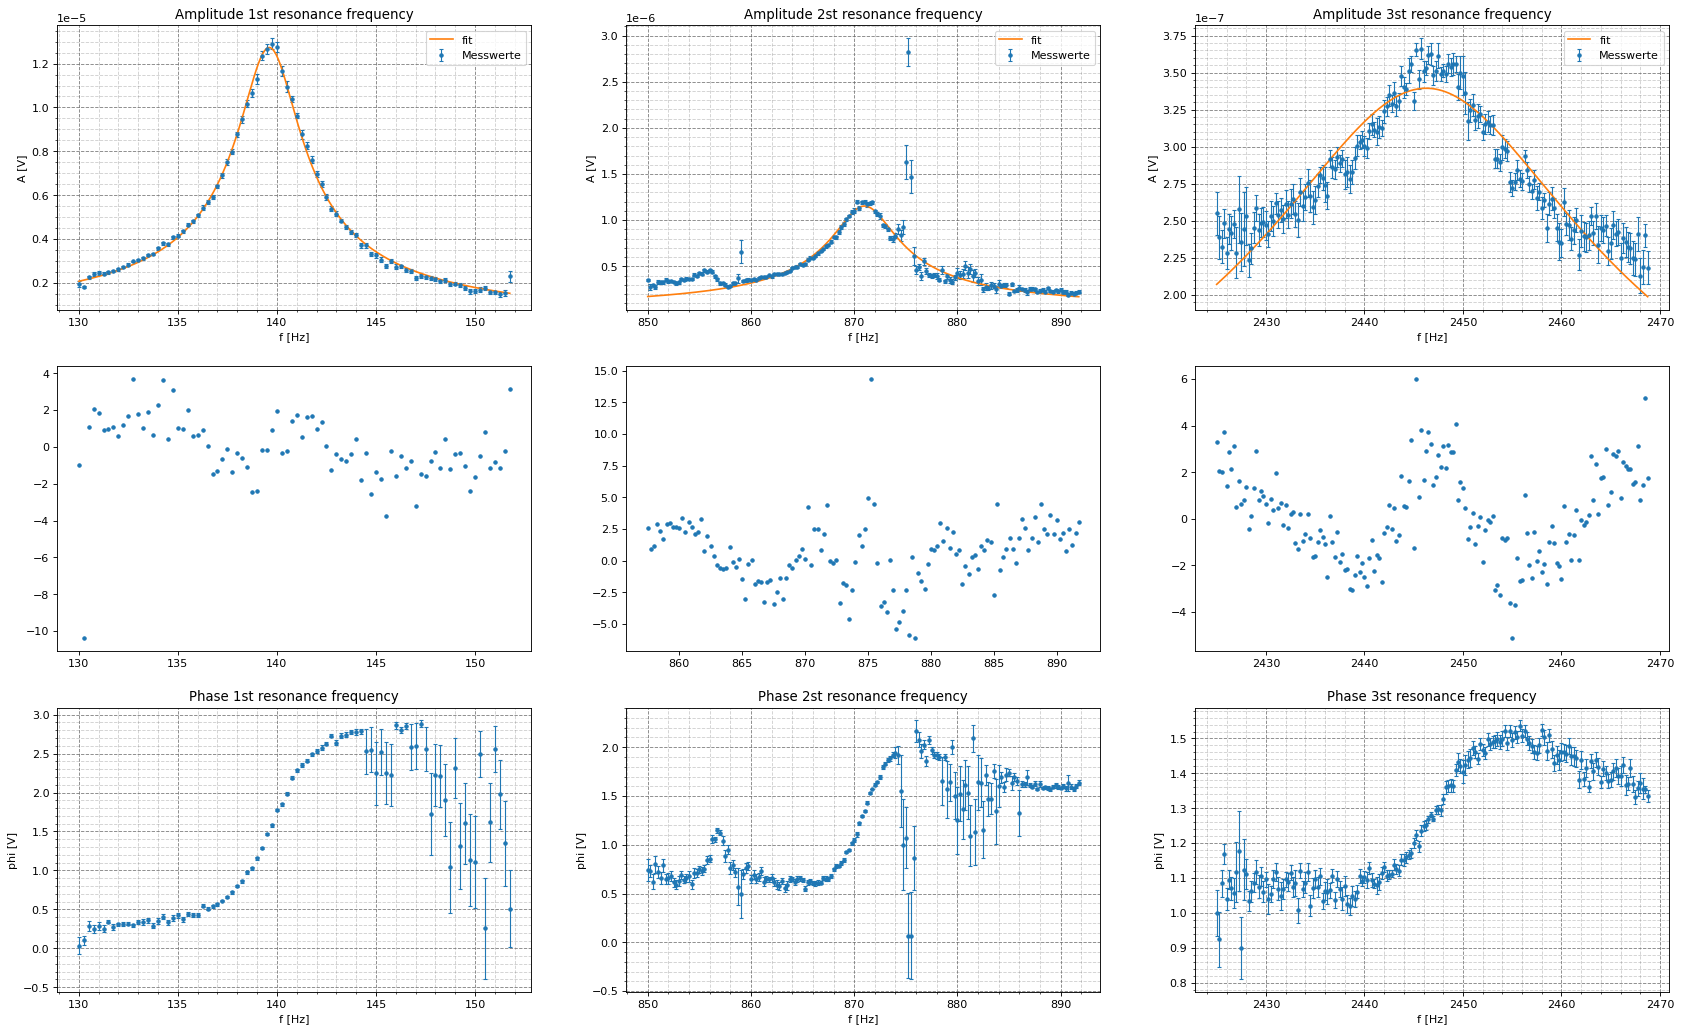

In [18]:
plt.figure(figsize=(26, 16), dpi=80)
res_freq_fit = np.array([0., 0., 0.])
res_freq_fit_err = np.array([0., 0., 0.])
guete_fit = np.array([0., 0., 0.])
guete_fit_err = np.array([0., 0., 0.])
for i in range(len(amp)):
    omega_rg = np.linspace(frequency[i][0], frequency[i][len(frequency[i])-1], 1000)
    if(i==1):
        popt_A, pcov_A = curve_fit(lorentz, frequency[i][30:], amp[i][30:], sigma=amp_err[i][30:], p0=[amp[i][int((len(amp[i])/2))], frequency[i][int((len(frequency[i])/2))], 3**i])
    else:
        popt_A, pcov_A = curve_fit(lorentz, frequency[i], amp[i], sigma=amp_err[i], p0=[amp[i][int((len(amp[i])/2))], frequency[i][int((len(frequency[i])/2))], 3**i])
    
    plt.subplot(3,3,i+1)
    plt.errorbar(frequency[i],amp[i], yerr = amp_err[i], linestyle='None', marker = ".", capsize = 2, elinewidth=1, label="Messwerte")
    plt.plot(omega_rg, lorentz(omega_rg, *popt_A), label="fit")
    plt.xlabel('f [Hz]')
    plt.ylabel('A [V]')
    plt.title('Amplitude ' + str(i+1) + 'st resonance frequency')
    #plt.yscale('log')
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.legend()
    plt.minorticks_on()
    
    plt.subplot(3,3,i+7)
    plt.errorbar(frequency[i],phase[i], yerr = phase_err[i], linestyle='None', marker = ".", capsize = 2, elinewidth=1)
    plt.xlabel('f [Hz]')
    plt.ylabel('phi [V]')
    plt.title('Phase ' + str(i+1) + 'st resonance frequency')
    #plt.yscale('log')
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    
    res_freq_fit[i] = popt_A[1]
    res_freq_fit_err[i] = np.sqrt(pcov_A[1,1])
    
    guete_fit[i] = popt_A[1] / popt_A[2]
    guete_fit_err[i] = guete_fit[i] * np.sqrt((np.sqrt(pcov_A[1,1])/popt_A[1])**2 + (np.sqrt(pcov_A[2,2])/popt_A[2])**2)
    
    print("In loop " + str(i) + ":")
    print("Zmax = " , popt_A[0] , " +- " , np.sqrt(pcov_A[0,0]))
    print("omega_0 = " , popt_A[1] , " +- " , np.sqrt(pcov_A[1,1]))
    print("gamma = " , popt_A[2] , " +- " , np.sqrt(pcov_A[2,2]))
    
    if(i==1):
        chi2_val=np.sum((lorentz(frequency[i][30:],*popt_A)-amp[i][30:])**2/amp_err[i][30:]**2)
        dof=len(frequency[i][30:])-3 #dof:degrees of freedom, Freiheitsgrad
        chi2_red=chi2_val/dof
        residuals = (amp[i][30:] - lorentz(frequency[i][30:], *popt_A)) / amp_err[i][30:]
        plt.subplot(3,3,i+4)
        plt.plot(frequency[i][30:], residuals, linestyle="None", marker=".")
    else: 
        chi2_val=np.sum((lorentz(frequency[i],*popt_A)-amp[i])**2/amp_err[i]**2)
        dof=len(frequency[i])-3 #dof:degrees of freedom, Freiheitsgrad
        chi2_red=chi2_val/dof
        residuals = (amp[i] - lorentz(frequency[i], *popt_A)) / amp_err[i]
        plt.subplot(3,3,i+4)
        plt.plot(frequency[i], residuals, linestyle="None", marker=".")
    prob=round(1-chi2.cdf(chi2_val,dof),2)*100
    print("chi2=", chi2_val)
    print("chi2_red=",chi2_red)
    print("P=", prob)
    
    
    
    

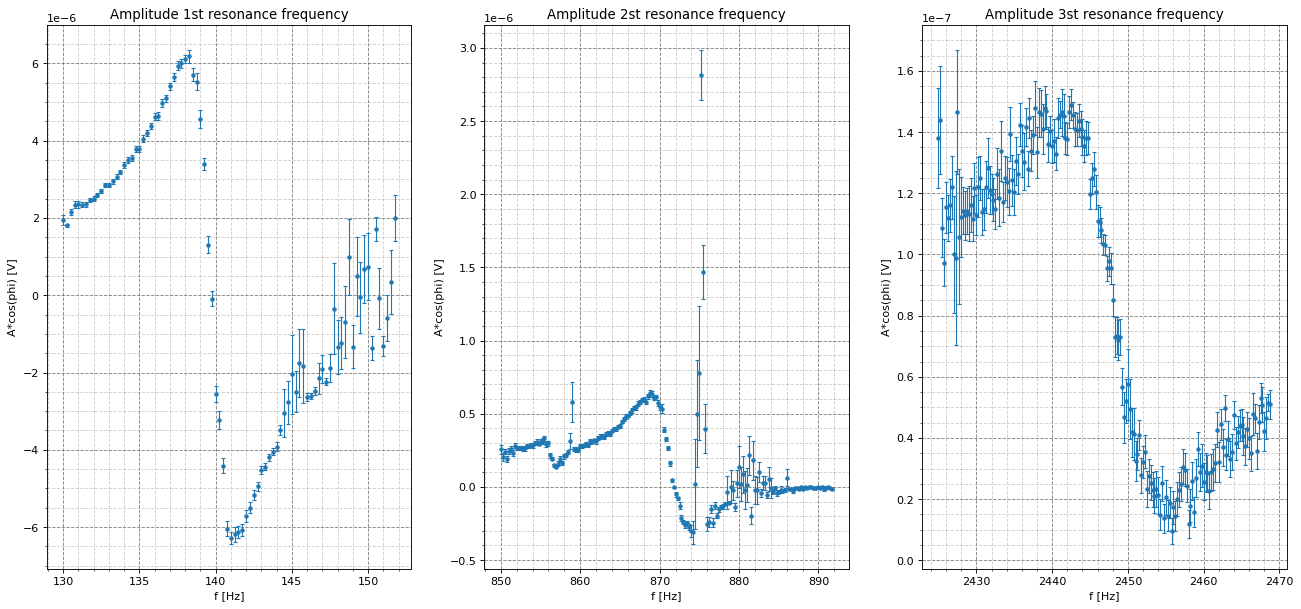

In [19]:
plt.figure(figsize=(20, 9), dpi=80)
for i in range(len(amp)):
    acosphi = amp[i]*np.cos(phase[i])
    acosphi_err = np.sqrt((amp_err[i]*np.cos(phase[i]))**2 + (amp[i]*np.sin(phase[i])*phase_err[i])**2)
    plt.subplot(1,3,i+1)
    plt.errorbar(frequency[i],acosphi, yerr = acosphi_err, linestyle='None', marker = ".", capsize = 2, elinewidth=1, label="A*cos(phi)")
    plt.xlabel('f [Hz]')
    plt.ylabel('A*cos(phi) [V]')
    plt.title('Amplitude ' + str(i+1) + 'st resonance frequency')
    #plt.yscale('log')
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()

In [20]:
res_freq_acosphi = np.array([139.6, 871.8])
res_freq_acosphi_err = np.array([1., 0.4])

res_freq_sigma = np.abs((res_freq_fit[:2] - res_freq_acosphi)/np.sqrt(res_freq_fit_err[:2]**2 + res_freq_acosphi_err**2))
print("Deviation between Acosphi and fit determined resonance frequency:")
print(res_freq_sigma)

Deviation between Acosphi and fit determined resonance frequency:
[0.00939876 1.97801936]


In [24]:
# bestimmung der Güte aus der breite bei halber höhe:
guete_curve = np.sqrt(3) * res_freq_fit[:2] / (2*np.array([5.2, 10.]))
guete_curve_err = guete_curve * np.sqrt((res_freq_fit_err[:2] / res_freq_fit[:2])**2 + (np.array([1, 0.8]) / np.array([5.2, 10.]))**2)

print(guete_curve)
print(guete_fit)

guete_sigma = np.abs((guete_fit[:2] - guete_curve)/np.sqrt(guete_curve_err**2 + guete_fit_err[:2]**2))
print("Deviation between Güte from fit and from plot:")
print(guete_sigma)

[23.2510168  75.43057119]
[ 45.49188635 138.58118731  74.94274715]
Deviation between Güte from fit and from plot:
[4.92065806 9.37041977]
